# **Titanic:Machine Learning Disaster**

Hello everyone,<br>
This is my first detailed contest notebook. A month ago I did the first submission just for fun and my ranking was around 80 percent. After that, I wanted to deal with it again and I was able to reduce it to **%8**.

Notebook content is as follows:

 - [Exploratory Data Analysis](#1)
 - [Missing Value Analysis](#2)
 - [Feature Engineering](#3)
 - [Label Encoding](#4)
 - [Modelling](#5)
 - [Submission](#6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
test_path = "/kaggle/input/titanic/test.csv"
train_path = "/kaggle/input/titanic/train.csv"

titanic_test = pd.read_csv(test_path)
titanic_train = pd.read_csv(train_path)

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


eksik değişkenler tipler sayılar hakkında bilgi ekle

<a id="1"></a> <br>
# **EDA**

In [6]:
categorical = []
numerical = []

for column in titanic_train.columns:
  if titanic_train[column].dtype == "object":
    categorical.append(column)
  else:
    numerical.append(column)

print("Categorical Variables: ", *categorical)
print("Numerical Variables: " , *numerical)

Categorical Variables:  Name Sex Ticket Cabin Embarked
Numerical Variables:  PassengerId Survived Pclass Age SibSp Parch Fare


## **Variables**

We have 12 variables, some of them categorical some of them numerical.<br>

**Categorical**:
  - Name
  - Sex
  - Ticket
  - Cabin
  - Embarked

**Numerical**:
  - PassengerId
  - Survived (target)
  - Pclass
  - Age
  - SibSp
  - Parch
  - Fare 

## **Survived**

- **Survived** is our target variable. As the name suggests, this variable gives us information about the passengers who survived the Titanic crash.

  - Survived = 1
  - Not Survived = 0


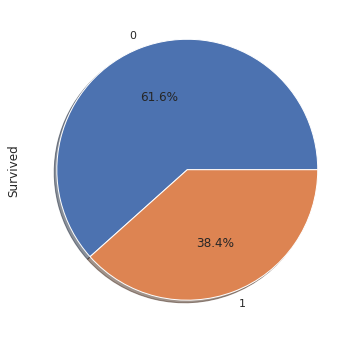

Number of Survived
0    549
1    342
Name: Survived, dtype: int64


In [7]:
values = titanic_train["Survived"].value_counts()

# plotting
values.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,6))
plt.show()

#printing the values
print("Number of Survived")
print(values)

- As we can see, there is a ratio of 60 to 40 percent.

## **Sex**

- Let's take a look at the number of men and women on board. 
- Next, let's examine the relationship between gender and target variable.

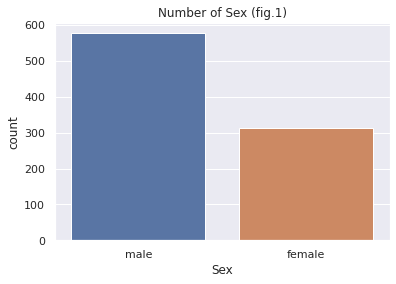

Proportion of Sex
male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [8]:
sns.countplot(x = "Sex", data = titanic_train)
plt.title("Number of Sex (fig.1)")
plt.show()

print("Proportion of Sex")
print(titanic_train.Sex.value_counts(normalize=True)*100)

#### **Sex-Survived**

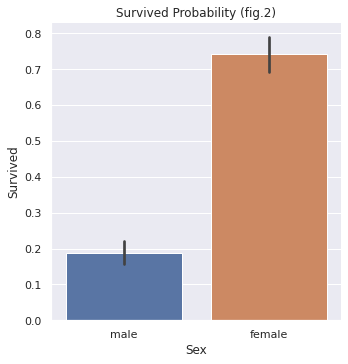

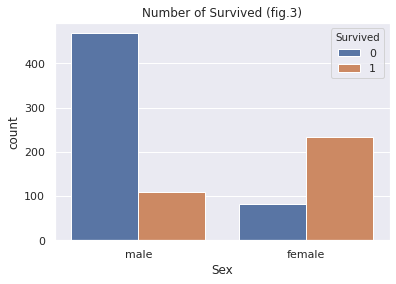

In [9]:
sns.catplot(x = "Sex", y="Survived",
            data=titanic_train, kind = "bar", height = 5)
plt.title("Survived Probability (fig.2)")
plt.show()

sns.countplot(x = "Sex", hue = "Survived", data = titanic_train)
plt.title("Number of Survived (fig.3)")
plt.show()

- When we look at the Figure 1, we see that 64 percent of the passengers on the ship are men.
- But only an average of 20 percent of the majority men survived according to Figure 2
- As far as we understand from all these graphs, we see that the rate of survival of women from this accident is higher.

## **Pclass**

**Pclass** shows us in which part of the ship the passengers travel. You can think of part number 1 as *First Class*. This variable actually gives us information about the **economic and social** status of the passengers.

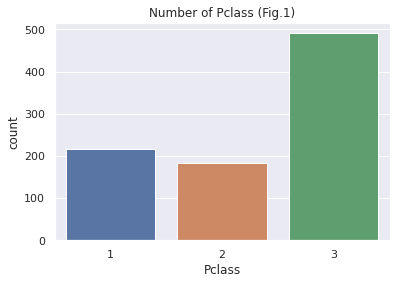

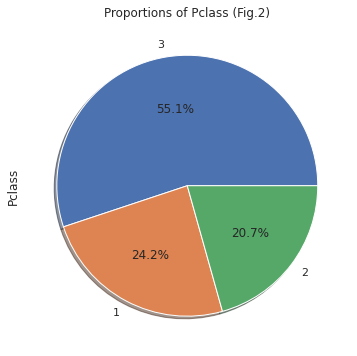

In [10]:
sns.countplot(x = "Pclass", data = titanic_train)
plt.title("Number of Pclass (Fig.1)")
plt.show()


titanic_train.Pclass.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,6))
plt.title("Proportions of Pclass (Fig.2)")
plt.show()

#### **Pclass-Survived**

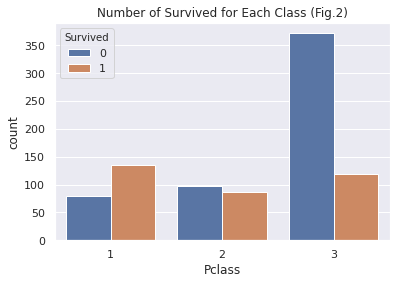

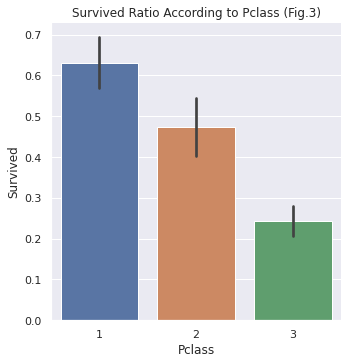

In [11]:
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_train)
plt.title("Number of Survived for Each Class (Fig.2)")
plt.show()
sns.catplot(x= "Pclass", y="Survived", data = titanic_train,
            kind = "bar", height = 5)
plt.title("Survived Ratio According to Pclass (Fig.3)")
plt.show()

- We can see that the number of First Class passengers on board is the highest from Fig1 and Fig2.
- And when we looked at the recovery rates, we found that likewise, those traveling in First Class were higher. The lowest rate is in 3rd class passengers.
- As far as I remember from the movie, 3rd class passengers were traveling in the lowest part of the ship. This is probably the reason for such a high death rate.

## **Age**
I don't think much of an explanation is needed, as the name suggests, it gives information about the ages of the passengers on board.

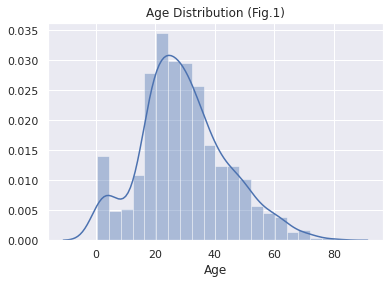

In [12]:
sns.distplot(titanic_train["Age"], bins = 20, kde = True)
plt.title("Age Distribution (Fig.1)")
plt.show()

#### **Age-Survived**


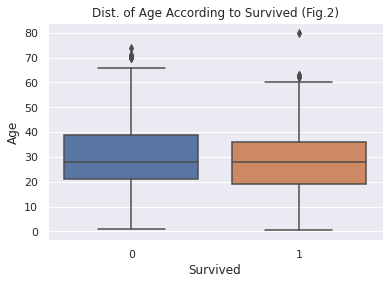

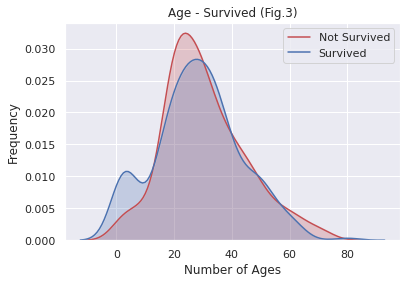

-- Mean of Age the Survived --
                Age
Survived           
0         30.626179
1         28.343690


In [13]:
# Box Plot
sns.boxplot(x ="Survived",y="Age", data = titanic_train)
plt.title("Dist. of Age According to Survived (Fig.2)")
plt.show()

# KDE plot
ax = sns.kdeplot(titanic_train.loc[(titanic_train.Survived == 0), "Age"],
                 color = "r", shade = True,label = "Not Survived")

ax = sns.kdeplot(titanic_train.loc[(titanic_train.Survived == 1), "Age"],
                 color = "b", shade = True, label = "Survived")
ax.legend(loc="upper right")
ax.set_xlabel("Number of Ages")
ax.set_ylabel("Frequency")
ax.set_title("Age - Survived (Fig.3)")
plt.show()

print("-- Mean of Age the Survived --")
print(titanic_train.groupby("Survived")[["Age"]].mean())

- As we can see from the graphics, we can say that there is a nearly young population on the Titanic.
- We can say that the average age of death(30.6) is higher than the survivors(28.3).

## **Cabin**

In [14]:
print(titanic_train.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [15]:
def extract_first(x):
  if str(x)[0:3] != "nan":
    return str(x)[0]

# extracting first letter of cabin values except nan values
titanic_train["Cabin_first"] = titanic_train.Cabin.apply(lambda x: extract_first(x))

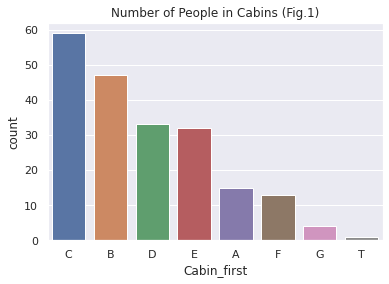

In [16]:
sns.countplot(x = "Cabin_first", data=titanic_train,
              order = titanic_train.Cabin_first.value_counts().index)
plt.title("Number of People in Cabins (Fig.1)")
plt.show()


### **Cabin-Survived**

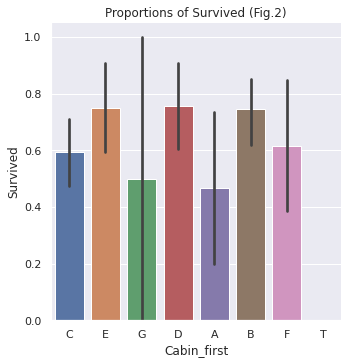

Mean of Age that each cabin part
                   Age
Cabin_first           
T            45.000000
A            44.833333
D            39.032258
E            38.116667
C            36.086667
B            34.955556
F            19.954545
G            14.750000
Mean of Survival Rate that each cabin part
             Survived
Cabin_first          
D            0.757576
E            0.750000
B            0.744681
F            0.615385
C            0.593220
G            0.500000
A            0.466667
T            0.000000


In [17]:
sns.catplot(x="Cabin_first", y="Survived",
            kind = "bar", height = 5, data = titanic_train)
plt.title("Proportions of Survived (Fig.2)")
plt.show()


print("Mean of Age that each cabin part")
print(titanic_train.groupby(titanic_train["Cabin_first"])[["Age"]].mean().sort_values(by ="Age",ascending=False))


print("Mean of Survival Rate that each cabin part")
print(titanic_train.groupby(titanic_train["Cabin_first"])[["Survived"]].mean().sort_values(by = "Survived",ascending=False))

- Most passengers are traveling in **Cabin C**
- Mean of Age according to each cabin like following:
  - T : 45.0
  - A : 44.1
  - D : 39.7
  - C : 38.3
  - E : 38.1
  - B : 36.4
  - F : 21.3
  - G : 12.0

- I will prepare Cabin_first feature as follows in Feature Engineering:
  - **High Survival Rate**: D,E,B,F,C
  - **Normal Survival Rate**: G, A
  - **Lower**: T


In [18]:
# but I will drop now because I will handle with that in F.Engineering
titanic_train = titanic_train.drop("Cabin_first", axis = 1)

## **Fare**
It tells us about the prices of passengers' tickets

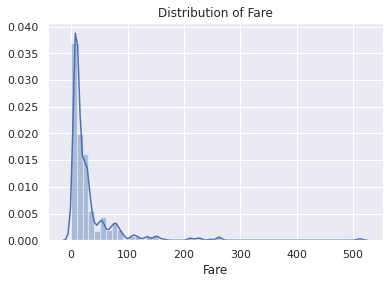

In [19]:
sns.distplot(titanic_train["Fare"], kde = True)
plt.title("Distribution of Fare")
plt.show()

### **Fare-Survived**

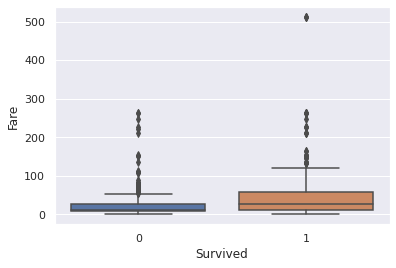

(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64
--------------------
Fare Mean According to Each Cabin


Cabin
B101               512.3292
C23 C25 C27        263.0000
B57 B59 B63 B66    262.3750
B51 B53 B55        258.6646
B58 B60            247.5208
                     ...   
F G73                7.6500
F G63                7.6500
A36                  0.0000
B94                  0.0000
B102                 0.0000
Name: Fare, Length: 147, dtype: float64

In [20]:
sns.boxplot(y = "Fare", x = "Survived", data = titanic_train)
plt.show()

# cut the fare into 4 parts
print(pd.cut(titanic_train['Fare'], 4).value_counts())
print("-"*20)
print("Fare Mean According to Each Cabin")
titanic_train["Fare"].groupby(titanic_train["Cabin"]).mean().sort_values(ascending = False)

In [21]:
titanic_train["Survived"].groupby(pd.cut(titanic_train['Fare'], 4)).mean()

Fare
(-0.512, 128.082]     0.368113
(128.082, 256.165]    0.724138
(256.165, 384.247]    0.666667
(384.247, 512.329]    1.000000
Name: Survived, dtype: float64

- I will group Fare values like as follows in F.Engineering :
  - **Very High Fare**: 384.247 - 512.329
  - **High Fare**: 256.165 - 384.247
  - **Normal Fare**: 128.082 - 256.165
  - **Low Fare**: -0.512, 128.082

## **Ticket**
Passengers' ticket codes

In [22]:
print(titanic_train["Ticket"].unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

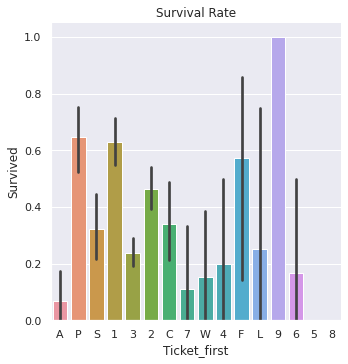

Surviving rates of first letters
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
8    0.000000
5    0.000000
Name: Survived, dtype: float64


In [23]:
# Get first letters of the tickets
titanic_train["Ticket_first"] = titanic_train["Ticket"].apply(lambda x: str(x)[0])


sns.catplot(x="Ticket_first", y="Survived", 
            height=5, kind="bar", data = titanic_train)
plt.title("Survival Rate")
plt.show()

print("Surviving rates of first letters")
print(titanic_train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

In [24]:
# but I will drop now because I will handle with that in F.Engineering
titanic_train = titanic_train.drop("Ticket_first", axis = 1)

## **Embarked**
The Embarked feature shows us at which port the passengers board the Titanic.
  - S: Southampton
  - C: Cherbourg
  - Q: Queenstown


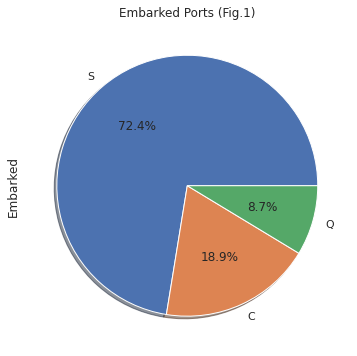

-- Mean of Age According to Each Embarked Points --
                Age
Embarked           
C         30.814769
Q         28.089286
S         29.445397


In [25]:
titanic_train.Embarked.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,6))
plt.title("Embarked Ports (Fig.1)")
plt.show()

print("-- Mean of Age According to Each Embarked Points --")
print(titanic_train.groupby("Embarked")[["Age"]].mean())

### **Embarked-Survived**

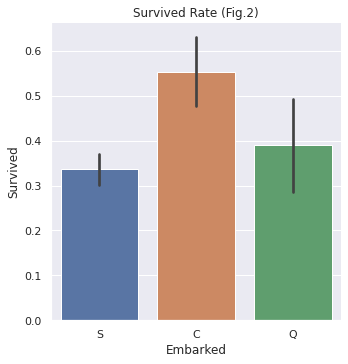

In [26]:
sns.catplot(x = "Embarked",y="Survived",
            data=titanic_train, kind="bar", height = 5)
plt.title("Survived Rate (Fig.2)")
plt.show()

- We see that the most passengers board the Titanic at **Southampton** from Figure 1.
- But we see that the people most likely to survived are the passengers on **Cherbourg** from Figure 2

## **SibSp**
Number of Sibling or Spouse in the Titanic

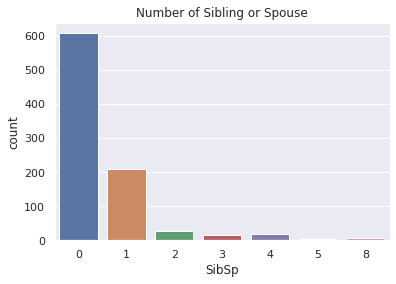

In [27]:
sns.countplot(x = "SibSp", data = titanic_train)
plt.title("Number of Sibling or Spouse")
plt.show()


### **SibSp-Survived**

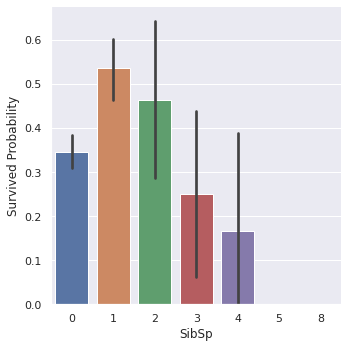

In [28]:
g = sns.catplot(x = "SibSp", y = "Survived",
                data = titanic_train, kind = "bar", height = 5)
g.set_ylabels("Survived Probability")
plt.show()

- Having a lot of **SibSp** have less chance to survive.
- If **SibSp** value is equal 0 or 1 or 2, passenger has more chance to survive
- We can consider a new feature describing these categories.

## **Parch**
Number of Parent or Child in the Titanic

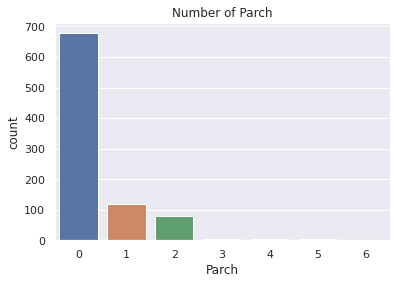

In [29]:
sns.countplot(x = "Parch", data = titanic_train)
plt.title("Number of Parch")
plt.show()

### **Parch-Survived**

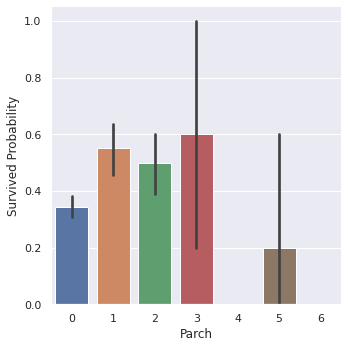

In [30]:
g = sns.catplot(x = "Parch", y = "Survived", 
                   kind = "bar", data = titanic_train, height = 5)
g.set_ylabels("Survived Probability")
plt.show()

- **SibSp** and **Parch** can be used for new feature extraction with th = 3
- Small familes have more chance to survive.
- There is a std in survival of passenger with Parch = 3

## **Name**
Passengers' names

In [31]:
titanic_train.Name.value_counts()

Andersson, Miss. Erna Alexandra                         1
Zimmerman, Mr. Leo                                      1
Bazzani, Miss. Albina                                   1
Ayoub, Miss. Banoura                                    1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
                                                       ..
Madill, Miss. Georgette Alexandra                       1
Bjornstrom-Steffansson, Mr. Mauritz Hakan               1
Robbins, Mr. Victor                                     1
Lang, Mr. Fang                                          1
Johannesen-Bratthammer, Mr. Bernt                       1
Name: Name, Length: 891, dtype: int64

In [32]:
# Get titles
titanic_train["Title"] = titanic_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Print title counts
print(titanic_train["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Ms                1
Jonkheer          1
Sir               1
Lady              1
Capt              1
the Countess      1
Don               1
Name: Title, dtype: int64


### **Name-Survived**

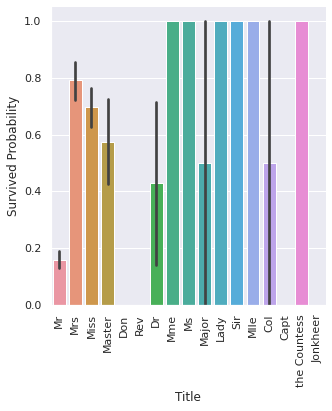

Title
the Countess    1.000000
Mlle            1.000000
Lady            1.000000
Ms              1.000000
Sir             1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Major           0.500000
Col             0.500000
Dr              0.428571
Mr              0.156673
Rev             0.000000
Jonkheer        0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


In [33]:
g = sns.catplot(x = "Title", y = "Survived",kind = "bar", 
                data = titanic_train, height = 5)
g.set_ylabels("Survived Probability")
plt.xticks(rotation=90) 
plt.show()

print(titanic_train["Survived"].groupby(titanic_train["Title"]).mean().sort_values(ascending=False))

I will group title by their surviving rates like following

  - **Higher** = the Countess, Mlle, Lady, Ms , Sir, Mme, Mrs, Miss, Master
  - **Neutral** = Major, Col, Dr
  - **Lower** = Mr, Rev, Jonkheer, Don, Capt

In [34]:
# but I will drop now because I will handle with that in F.Engineering
titanic_train = titanic_train.drop("Title", axis = 1)

<a id="2"></a> <br>
# **Missing Value Analysis**

In [35]:
# Before starting imputation I will take a copy from my original dataset
data1 = titanic_train.copy()
data2 = titanic_test.copy()

In [36]:
def missing_val_table(data):
    """
    Takes the dataframe as Input and returns the missing values and
    percentages with respect to dataframe length.
    """
    missing_val = data.isnull().sum()
    missing_val_perc = 100 * data.isnull().sum() / len(data)
    table = pd.concat([missing_val, missing_val_perc], axis=1)
    table = table.rename(columns = {0:"Missing Values",
                                    1:"% of Total Values"})
    table = table.sort_values(by="% of Total Values",
                              ascending=False)
    return table

missing_val_table(data1)

,Missing Values,% of Total Values
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


- I will impute as follows:
  - Mean: Age
  - Mode: Cabin and Embarked

In [37]:
# imputing Age
data1["Age"] = data1["Age"].fillna(data1["Age"].mean())
data2["Age"] = data2["Age"].fillna(data2["Age"].mean())

# imputing Embarked
data1["Embarked"] = data1["Embarked"].fillna(data1["Embarked"].mode()[0])
data2["Embarked"] = data2["Embarked"].fillna(data2["Embarked"].mode()[0])

<a id="3"></a> <br>
# **Feature Engineering**

## **Cabin**
I will prepare first letter of Cabin feature as follows in Feature Engineering:

- **High Survival Rate**: D,E,B,F,C
- **Normal Survival Rate**: G, A
- **Lower**: T

In [38]:
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

# extract first letter
data1["Cabin"] = data1["Cabin"].apply(lambda x: str(x)[0])
data2["Cabin"] = data2["Cabin"].apply(lambda x: str(x)[0])

# apply the function
data1["Cabin_first"] = data1["Cabin"].apply(lambda x: assign_label_cabin(x))
data2["Cabin_first"] = data2["Cabin"].apply(lambda x: assign_label_cabin(x))

#drop the cabin feature
data1 = data1.drop("Cabin", axis = 1)
data2 = data2.drop("Cabin", axis = 1)

## **Fare**
I will group Fare values like as follows:
  - **Very High Fare**: 384.247 - 512.329
  - **High Fare**: 256.165 - 384.247
  - **Normal Fare**: 128.082 - 256.165
  - **Low Fare**: -0.512, 128.082

In [39]:
def fare_bound(x):
  x = float(x)
  if (x > 384.247) & (x <= 512.329):
    return "Very High Fare"
  elif (x > 256.165) & (x <= 384.247):
    return "High Fare"
  elif (x > 128.082) & (x <= 256.165):
    return "Normal Fare"
  else:
    return "Low Fare"

# apply the function
data1["Fare_cat"] = data1["Fare"].apply(lambda x: fare_bound(x))
data2["Fare_cat"] = data2["Fare"].apply(lambda x: fare_bound(x))

#drop the fare feature
data1 = data1.drop("Fare", axis = 1)
data2 = data2.drop("Fare", axis = 1)

## **Ticket**
I am going to group them like as follows:

  - **Ticket High** = F, 1, P , 9
  - **Ticket Middle** = S, C, 2
  - **Ticket Low** = else

In [40]:
def label_ticket(x):
    if x in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif x in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"

# extract first letter
data1["Ticket"] = data1["Ticket"].apply(lambda x: str(x)[0])
data2["Ticket"] = data2["Ticket"].apply(lambda x: str(x)[0])

# apply the function
data1["Ticket_cat"] = data1["Ticket"].apply(lambda x: label_ticket(x))
data2["Ticket_cat"] = data2["Ticket"].apply(lambda x: label_ticket(x))


#drop the ticket feature
data1 = data1.drop("Ticket", axis = 1)
data2 = data2.drop("Ticket", axis = 1)

## **Name**
I will group title by their surviving rates like following

  - **Higher** = the Countess, Mlle, Lady, Ms , Sir, Mme, Mrs, Miss, Master
  - **Neutral** = Major, Col, Dr
  - **Lower** = Mr, Rev, Jonkheer, Don, Capt

In [41]:
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"

# extract title from the name
data1["Title"] = data1['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data2["Title"] = data2['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

#apply the function
data1["Title"] = data1["Title"].apply(lambda x: assign_label_title(x))
data2["Title"] = data2["Title"].apply(lambda x: assign_label_title(x))

#drop the name
data1 = data1.drop("Name", axis = 1)
data2 = data2.drop("Name", axis = 1)

## **SibSp & Parch**

In [42]:
data1["family_size"] = data1["SibSp"] + data1["Parch"]
data2["family_size"] = data2["SibSp"] + data2["Parch"]

In [43]:
def family_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"

#apply the function
data1["family_size"] = data1["family_size"].apply(lambda x: family_label(x))
data2["family_size"] = data2["family_size"].apply(lambda x: family_label(x))

#drop the SibSp and Parch
data1 = data1.drop("SibSp", axis=1)
data1 = data1.drop("Parch", axis =1)

data2 = data2.drop("Parch", axis =1)
data2 = data2.drop("SibSp", axis =1)

**Lets drop also PassengerId**

In [44]:
data1 = data1.drop("PassengerId", axis = 1)
data2 = data2.drop("PassengerId", axis = 1)

**Let's look at the final version of our data set at the end of Feature Engineering**

In [45]:
display(data1.head())
display(data2.head())

,Survived,Pclass,Sex,Age,Embarked,Cabin_first,Fare_cat,Ticket_cat,Title,family_size
0,0,3,male,22.0,S,Cabin_low,Low Fare,Ticket_low,Title_low,Small_family
1,1,1,female,38.0,C,Cabin_high,Low Fare,Ticket_high,Title_high,Small_family
2,1,3,female,26.0,S,Cabin_low,Low Fare,Ticket_middle,Title_high,Alone
3,1,1,female,35.0,S,Cabin_high,Low Fare,Ticket_high,Title_high,Small_family
4,0,3,male,35.0,S,Cabin_low,Low Fare,Ticket_low,Title_low,Alone


,Pclass,Sex,Age,Embarked,Cabin_first,Fare_cat,Ticket_cat,Title,family_size
0,3,male,34.5,Q,Cabin_low,Low Fare,Ticket_low,Title_low,Alone
1,3,female,47.0,S,Cabin_low,Low Fare,Ticket_low,Title_high,Small_family
2,2,male,62.0,Q,Cabin_low,Low Fare,Ticket_middle,Title_low,Alone
3,3,male,27.0,S,Cabin_low,Low Fare,Ticket_low,Title_low,Alone
4,3,female,22.0,S,Cabin_low,Low Fare,Ticket_low,Title_high,Small_family


<a id="4"></a> <br>
# **Label Encoding**

In [46]:
data1_new = data1.copy()
data2_new = data2.copy()

In this part I'm going to follow:
- LabelEncoding: Sex
- OneHotEncoding: Rest

In [47]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

data1_new["Sex"] = labelEncoder.fit_transform(data1[["Sex"]].values.ravel())
data2_new["Sex"] = labelEncoder.fit_transform(data2_new[["Sex"]].values.ravel())

In [48]:
data1_new = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket_cat", "Fare_cat","Cabin_first","Title", "family_size"], data=data1_new, drop_first=True)
data2_new = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket_cat", "Fare_cat", "Cabin_first","Title", "family_size"], data=data2_new, drop_first=True)

**Final look our data**

In [49]:
display(data1_new.head())

,Survived,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_cat_Ticket_low,Ticket_cat_Ticket_middle,Fare_cat_Low Fare,Fare_cat_Normal Fare,Cabin_first_Cabin_low,Cabin_first_Cabin_middle,Title_Title_low,Title_Title_middle,family_size_Big_family,family_size_Small_family
0,0,1,22.0,0,1,0,1,1,0,1,0,1,0,1,0,0,1
1,1,0,38.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,26.0,0,1,0,1,0,1,1,0,1,0,0,0,0,0
3,1,0,35.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,0,1,0,1,1,0,1,0,1,0,1,0,0,0


In [50]:
display(data2_new.head())

,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_cat_Ticket_low,Ticket_cat_Ticket_middle,Fare_cat_Low Fare,Fare_cat_Normal Fare,Cabin_first_Cabin_low,Cabin_first_Cabin_middle,Title_Title_low,Title_Title_middle,family_size_Big_family,family_size_Small_family
0,1,34.5,0,1,1,0,1,0,1,0,1,0,1,0,0,0
1,0,47.0,0,1,0,1,1,0,1,0,1,0,0,0,0,1
2,1,62.0,1,0,1,0,0,1,1,0,1,0,1,0,0,0
3,1,27.0,0,1,0,1,1,0,1,0,1,0,1,0,0,0
4,0,22.0,0,1,0,1,1,0,1,0,1,0,0,0,0,1


<a id="5"></a> <br>
# **Modelling**

I will import necessary libraries

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [52]:
# I will make another copy
train = data1_new.copy()
test = data2_new.copy() 

X = train.drop("Survived", axis = 1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify=y)

### **Random Forest**

In [53]:
rf = RandomForestClassifier()

params = {'n_estimators': [100,300,500,700,1000],
          'max_depth': [3,5,7],
          'criterion':['entropy', 'gini'],
          'min_samples_leaf' : [1, 2, 3, 4, 5],
          'max_features':['auto'],
          'min_samples_split': [3, 5, 10],
          'max_leaf_nodes':[2,3,5,7],
          }

rf_cv = RandomizedSearchCV(rf, params, cv = 10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.2s finished


In [54]:
rf_cv.best_params_
best_rf_model = rf_cv.best_estimator_

print(best_rf_model)
print(rf_cv.best_score_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=500)
0.8377624167946749


In [55]:
rf_pred = rf_cv.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, rf_pred))

# Display the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, rf_pred))

Accuracy:  0.8059701492537313

Confusion Matrix

[[141  24]
 [ 28  75]]


Let's save the model

In [56]:
import pickle

pickle.dump(best_rf_model, open("titanic_model.pkl", 'wb'))

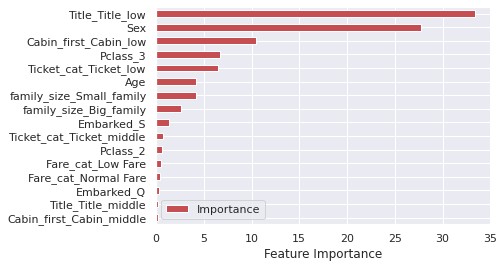

In [57]:
Importance = pd.DataFrame({"Importance": best_rf_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importance")
plt.show()

In [58]:
last_model =RandomForestClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=500).fit(X,y)

In [59]:
IDs = pd.read_csv(test_path)[["PassengerId"]].values

predictions = last_model.predict(test.values)

print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


<a id="6"></a> <br>
# **Submission**

In [60]:
result_df = {'PassengerId': IDs.ravel(), 'Survived':predictions}
submission = pd.DataFrame(result_df)

display(submission.head())


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
# Save the file
submission.to_csv("titanic_sub.csv", index=False)